# Assignment 3

### Student 1: Francisco Soares Pinto da Silva Neves

## 1. Neural Networks

Consider the following fully connected neural network. It consists of an input layer, three hidden layers and an output layer. The first hidden layer utilized ReLU as its non-linearity function, whereas the second uses Tanh and the last uses the Sigmoid function. The output layer also utilizes the Sigmoid function. Consider $W_1, W_2, W_3 $and $W_4$ as a set of weight parameters, $x$ as your input, $y$ as the ground-truth and $\hat{y}$ as the network prediction/output. 

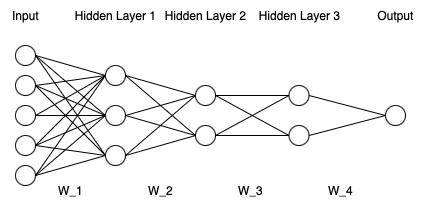

### 1.1 (Pen and Paper) 

##### Note that python should not be used.

**a)** How many parameters does this network have? Do not forget to include the bias in the three hidden layers and the output layer.  Explicitly show how you achieved your answer. 

#### (1) Number of parameters for Hidden Layer 1
Since the input layer has 5 features and the Hidden Layer 1 has 3 neurons, the total number of weight parameters is $5\times3 = 15$. Also, there is a bias for each neuron so there are 3 bias in total. Hence, in total, the number of parameters for the Hidden Layer 1 is $15 + 3 = 18$.
#### (2) Number of parameters for Hidden Layer 2
Since the previous Hidden Layer 1 has 3 neurons and the Hidden Layer 2 has 2 neurons, the total number of weight parameters is $3\times2 = 6$. Also, there is a bias for each neuron so there are 2 bias in total. Hence, in total, the number of parameters for the Hidden Layer 2 is $6 + 2 = 8$.
#### (3) Number of parameters for Hidden Layer 3
Since the previous Hidden Layer 2 has 2 neurons and the Hidden Layer 3 has 2 neurons, the total number of weight parameters is $2\times2 = 4$. Also, there is a bias for each neuron so there are 2 bias in total. Hence, in total, the number of parameters for the Hidden Layer 3 is $4 + 2 = 6$.
#### (4) Number of parameters for Output layer
Since the previous Hidden Layer 3 has 2 neurons and the Output layer has 1 neuron, the total number of weight parameters is $2\times1 = 2$. Also, there is a bias for each neuron so there is 1 bias in total. Hence, in total, the number of parameters is $2 + 1 = 3$.

Therefore, this network has $18+8+6+3=35$ parameters.


**b)** Considering the following cost/loss function $C(\hat{y}) = \frac{1}{2}||\hat{y} - y||^2$, derive $\frac{\partial C}{\partial W_1}$. Explicitly show the relation between $\frac{\partial C}{\partial W_1}$ and $\frac{\partial C}{\partial W_2}$.

The process of tuning the parameters of neural network is described by performing backpropagation. Backpropagation is a recursive process in which, from the output layer to the first hidden layer of the network, gradient relationships of the form $\frac{\partial C}{\partial W_k}$ with respect to each hidden layer $k$ are found. 

The feed forward propagation is the process of propagating the input values across the network, from a layer $j$ to a layer $k$ , where $j$ and $k$ are the indices of the previous layer and the next layer, respectively, and $L$ is the total number of layers in the network. This process is described by the following steps:
1. Initialize $k = 1$ and $j = k - 1$,
2. A weighted sum $z_k = W_k a_j$,
3. An activation operation $h$ on $z_k$ that is $a_k = h(z_k)$, where $h$ is any activation function on a layer, assuming that every neuron of a respective layer applies the same activation function (e.g., $h(z) = sigmoid(z), h(z) = tanh(z), h(z) = max(0,z), ...$),
4. Go back to 1, until $k = L$ and update $k = k + 1$ and $ j = j + 1$.

Explicitly, the forward propagation computes the following equations, recursively: $z_1 = W_1 X$, $a_1 = \max(0,z_1)$, $z_2 = W_2 a_1$, $a_2 = \tanh(z_2)$, $z_3 = W_3 a_2$, $a_3 = \sigma(z_3)$, $z_4 = W_4 a_3$ and $\hat{y} = a_4 = \sigma(z_4)$.

The backpropagation applies the chain rule for partial derivatives $\frac{\partial C}{\partial W_k}$, until the desired layer $k$.

#### (1) Deriving $\frac{\partial C}{\partial W_2}$
$\frac{\partial C}{\partial W_2}$ is defined by:
$\begin{equation}
\begin{split}
    \frac{\partial C}{\partial W_2} &= \frac{\partial C}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial z_4} \frac{\partial z_4}{\partial a_3} \frac{\partial a_3}{\partial z_3} \frac{\partial z_3}{\partial a_2} \frac{\partial a_2}{\partial z_2} \frac{\partial z_2}{\partial W_2} \\
    &= (\hat{y} - y) \cdot \sigma^{\prime}(z_4) \cdot W_4 \cdot \sigma^{\prime}(z_3) \cdot W_3 \cdot \tanh^{\prime}(z_2) \cdot a_1 \\
    &= (\hat{y} - y) \cdot \sigma(z_4)(1 - \sigma(z_4)) \cdot W_4 \cdot \sigma(z_3)(1 - \sigma(z_3)) \cdot W_3 \cdot (1 - \tanh(z_2)^2) \cdot a_1,
\end{split}
\end{equation}$

#### (2) Deriving $\frac{\partial C}{\partial W_1}$
$\frac{\partial C}{\partial W_1}$ is defined by: 
$\begin{equation}
\begin{split}
    \frac{\partial C}{\partial W_1} &= \frac{\partial C}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial z_4} \frac{\partial z_4}{\partial a_3} \frac{\partial a_3}{\partial z_3} \frac{\partial z_3}{\partial a_2} \frac{\partial a_2}{\partial z_2} \frac{\partial z_2}{\partial a_1} \frac{\partial a_1}{\partial z_1} \frac{\partial z_1}{\partial W_1}\\
    &= (\hat{y} - y) \cdot \sigma^{\prime}(z_4) \cdot W_4 \cdot \sigma^{\prime}(z_3) \cdot W_3 \cdot \tanh^{\prime}(z_2) \cdot W_2 \cdot ReLU^{\prime}(z_1
    ) \cdot X\\
    &= (\hat{y} - y) \cdot \sigma(z_4)(1 - \sigma(z_4)) \cdot W_4 \cdot \sigma(z_3)(1 - \sigma(z_3)) \cdot W_3 \cdot (1 - \tanh(z_2)^2) \cdot W_2 \cdot \left(\begin{cases}
        1 & \text{if } z_1 \ge 0\\
        0 & \text{if } z_1 < 0
    \end{cases}\right) \cdot X,
\end{split}
\end{equation}$
where $\sigma(z_i) = \frac{1}{1 + e^{-z_i}}$, $\tanh(z_i) = \frac{e^{z_i} - e^{-z_i}}{e^{z_i} + e^{-z_i}}$ and $ReLU(z_i) = \max(0,z_i)$.

#### (3) Relationship between $\frac{\partial C}{\partial W_1}$ and $\frac{\partial C}{\partial W_2}$
Finally, the following relationship between $\frac{\partial C}{\partial W_1}$ and $\frac{\partial C}{\partial W_2}$ is described by:
$\begin{equation}
\begin{split}
    \frac{\partial z_2}{\partial W_2} \frac{\partial C}{\partial W_1} &= \frac{\partial z_2}{\partial a_1} \frac{\partial a_1}{\partial z_1} \frac{\partial z_1}{\partial W_1} \frac{\partial C}{\partial W_2} \\
    \frac{\partial C}{\partial W_1} &= \frac{\frac{\partial z_2}{\partial a_1} \frac{\partial a_1}{\partial z_1} \frac{\partial z_1}{\partial W_1}}{\frac{\partial z_2}{\partial W_2}} \frac{\partial C}{\partial W_2} \\
    \frac{\partial C}{\partial W_1} &= \frac{W_2 \cdot ReLU^{\prime}(z_1) \cdot X}{a_1} \frac{\partial C}{\partial W_2}
\end{split}
\end{equation}$


**c)** What is the behaviour of the network if we initialize all weights to zero? What causes such behaviour? 

If all weights are initialized to zero, such as $W_1 = W_2 = W_3 = W_4 = \vec{0}$, the backpropagation never "moves" and thus the neural network never learns. 
Zero vector weights produce zero derivatives during backpropagation $\frac{\partial C}{W_i} = 0, \forall i \in \{1,4\}$, e.g.,: $\frac{\partial C}{\partial W_1} = \frac{0 \cdot ReLU^{\prime}(z_1) \cdot X}{a_1} \frac{\partial C}{\partial W_2} = 0$.
Thus, the literature suggests random initialization of weights near zero and never zero.

## 2. Neural Networks

### (Python Exercise)

Consider the `heightWeightData.txt` dataset that you have used in the Lab classes. You will use this data to build a Neural Network classifier that predicts the sex of an individual given their height and weight.

**a)** Train a fully-connected neural network classifier, with less than **20 parameters**, **using only the first 120 rows** of the dataset as training data. You should use the Keras framework. Utilize sigmoid as the non-linearity function, SGD as the optimizer, a batch size of 120, and a learning rate of 0,001. Do not change other configuration besides the number and size of the hidden layers, and the others previously mentioned. **Print the values of the learned parameters.**

2022-12-21 20:49:07.194426: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ros/noetic/lib
2022-12-21 20:49:07.194452: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-21 20:49:09.941122: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ros/noetic/lib
2022-12-21 20:49:09.941168: W tensorflow/stream_executor/cuda/cuda_driver.cc:312] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-21 20:49:09.941195: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fsn9-ThinkPad-T450): /proc/driver/nvidia/versi

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 4)                 12        
_________________________________________________________________
layer2 (Dense)               (None, 1)                 5         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________
Summary of the model:  None
Learned parameters:
Weights of layer layer1: [[ 1.6794743e-01  7.6291966e-01 -6.2534446e-01 -1.0625373e-03]
 [-4.3990258e-02  1.8915768e+00 -1.4260718e+00  4.1139933e-01]]
Biases of layer layer1: [-0.40927806  1.0514108   0.72398794 -0.46297508]
Weights of layer layer2: [[ 0.3045213 ]
 [-1.2997986 ]
 [ 1.8552814 ]
 [ 0.78283215]]
Biases of layer layer2: [-0.03441635]


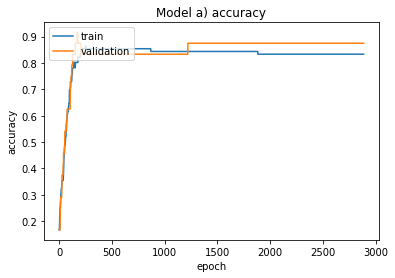

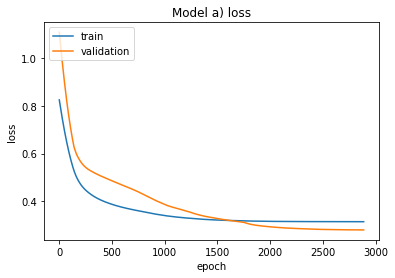

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# 0. Set seed
tf.random.set_seed(20)

# 1. Define hyperparameters
lr, batch_size, epochs = 1e-3, 120, 3000

# 2. Get data
data = pd.read_csv('heightWeightData.txt', sep = ",", header = None)
x_train, y_train = data.iloc[:120,1:].to_numpy(copy = True).reshape(-1,2), (data.iloc[:120,0].to_numpy(copy = True) - 1).reshape(-1,1).astype("int32")

# Standardize
x_train = StandardScaler().fit_transform(x_train)

# 3. Define optimizer
optimizer = keras.optimizers.Adam(learning_rate=lr)
    
# 4. Define loss function
loss_fn = keras.losses.BinaryCrossentropy(from_logits = True)

# 5. Define metrics
metrics = keras.metrics.BinaryAccuracy()

# 6. Build the model
model = keras.Sequential(
    [
        layers.Dense(4, input_shape = (2,), activation=keras.layers.LeakyReLU(), name="layer1"),
        layers.Dense(1, activation=keras.layers.LeakyReLU(), name="layer2")
    ]
)
print('Summary of the model: ', model.summary())

# 7. Compile the keras model
model.compile(loss=loss_fn, optimizer=optimizer, metrics=[metrics])

# Defining early stopping policy to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# 8. Train the model
history = model.fit(x=x_train, y=y_train, validation_split=0.2, epochs=epochs, callbacks = [early_stopping], batch_size=batch_size, verbose=0)

# 9. Print the learned weights
print('Learned parameters:')
for i, layer in enumerate(model.layers):
    print(f'Weights of layer {layer.name}: {layer.get_weights()[0]}')
    print(f'Biases of layer {layer.name}: {layer.get_weights()[1]}')


plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('Model a) accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model a) loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


By selecting the SGD optimizer and independently of the choice of the activation function (sigmoid, LeakyReLU or ReLU) only with a huge number of epochs ($\approx [6000,8000]$), the model would converge to a reasonable binary training accuracy ($\approx 80\%$). 
By running several experiments, I concluded that only by choosing a patience parameter approximately equal to 1, the binary training accuracy would increase to values around $90\%$.

Next, I decided to change the optimizer from the SGD to the Adam, as strongly recommended by the literature that resulted in improved sample efficiency (better accuracy for less epochs). Empirically:
- By keeping the sigmoid as the activation function, with a reasonably lower amount of epochs ($\approx 2000$), a binary training accuracy of $\approx 86\%$ and a binary validation accuracy of $\approx 88\%$ could be achieved. 
- By using a LeakyReLU (with an $\alpha = 0.3$ by default) as an activation function both on the hidden and the output layer, a binary training accuracy of $\approx 83\%$ and a binary validation accuracy of $\approx 88\%$ were achieved for only $2000$ epochs. 
- Finally, by using a standard ReLU (with an $\alpha = 0.3$ by default) as an activation function both on the hidden and the output layer, a binary training accuracy of $\approx 85\%$ and a binary validation accuracy of $\approx 83\%$ were achieved for only $400$ epochs. 

Empirically, the sigmoid activation function was very sensitive to the random weight initialization: for some random seeds, the sigmoid behaves well (with high accuracy and monotically descendent validation and training losses), but for others it gets stuck in the flat parts of the sigmoid function where the gradient is close to zero. Because of this vanishing gradients problem, the choice for other less sensitive activation functions is vital.
From experience it was also verified that the LeakyReLU achieved a better generalized behaviour, resulting from lower validation losses and higher validation accuracies, hence it is preferred against ReLU.

Consequently, by keeping constant the learning rate ($lr=1^{-3}$) and the batch size ($batchSize=120$), the combination between the Adam optimizer and the LeakyReLU activation function resulted in the best model. It achieves better training and generalization accuracies (since the validation accuracy improved at the same rate as the training accuracy until plateauing), and it is more robust against several random seeds when compared to sigmoid. 
The early stopping policy was included during training to prevent overfitting. A random seed of a fixed value was also set to make the results reproducible. 


**b)** Compute the predictions of your model in the remaining 90 rows of the dataset and report the classification accuracy of your model in this test set.

In [2]:
x_test, y_test = data.iloc[-90:,1:].to_numpy().reshape(-1,2), (data.iloc[-90:,0].to_numpy() - 1).reshape(-1,1).astype("int32")
x_test = StandardScaler().fit_transform(x_test)
evaluation = model.evaluate(x_test, y_test, verbose = 0)
preds = model.predict(x_test)
print(f'Accuracy for exercise b): {evaluation[1]}')

Accuracy for exercise b): 0.8777777552604675


**c)** Repeat a) and b) with a network with up to **400 parameters**. There is no need to print the learned parameters.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 8)                 24        
_________________________________________________________________
layer2 (Dense)               (None, 32)                288       
_________________________________________________________________
layer3 (Dense)               (None, 1)                 33        
Total params: 345
Trainable params: 345
Non-trainable params: 0
_________________________________________________________________
Summary of the model:  None
Accuracy: 0.8999999761581421


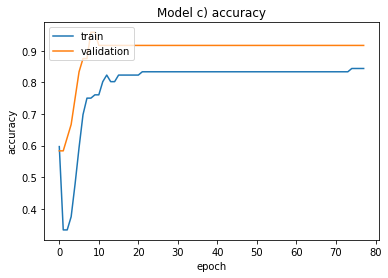

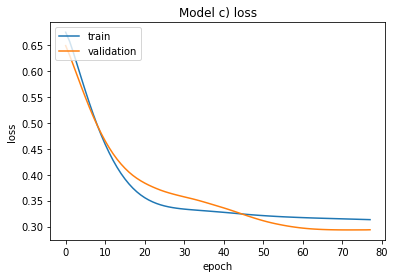

In [3]:
# 1. Changing the model and keeping optimizer, loss function and metrics from previous model
model = keras.Sequential(
    [
        layers.Dense(8, input_shape = (2,), activation=keras.layers.LeakyReLU(), name="layer1"),
        layers.Dense(32, activation=keras.layers.LeakyReLU(), name="layer2"),
        layers.Dense(1, activation=keras.layers.LeakyReLU(), name="layer3")
    ]
)
print('Summary of the model: ', model.summary())

# 2. Compile the keras model
model.compile(loss=loss_fn, optimizer=optimizer, metrics=[metrics])

# 3. Train the model
history = model.fit(x=x_train, y=y_train, validation_split=0.2, epochs=epochs, callbacks = [early_stopping], batch_size=batch_size, verbose=0)

# 4. Evaluate
evaluation = model.evaluate(x_test, y_test, verbose = 0)
preds = model.predict(x_test)
print(f'Accuracy: {evaluation[1]}')

plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('Model c) accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model c) loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**d)** Repeat c), but add $L_2$ regularization.  Try the all following **$\lambda \in$  {0.1, 0.3, 0.5, 0.9}.**

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 8)                 24        
_________________________________________________________________
layer2 (Dense)               (None, 32)                288       
_________________________________________________________________
layer3 (Dense)               (None, 1)                 33        
Total params: 345
Trainable params: 345
Non-trainable params: 0
_________________________________________________________________
Summary of the model for lambda 0.1: None
Accuracy for lambda 0.1: 0.9111111164093018


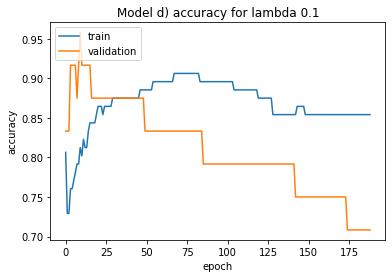

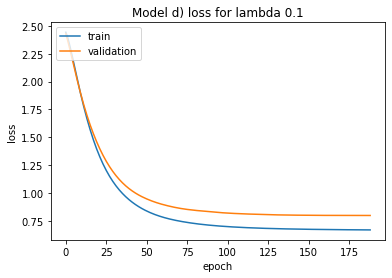

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 8)                 24        
_________________________________________________________________
layer2 (Dense)               (None, 32)                288       
_________________________________________________________________
layer3 (Dense)               (None, 1)                 33        
Total params: 345
Trainable params: 345
Non-trainable params: 0
_________________________________________________________________
Summary of the model for lambda 0.3: None
Accuracy for lambda 0.3: 0.699999988079071


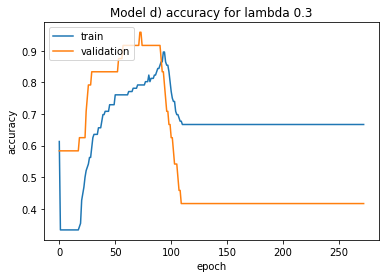

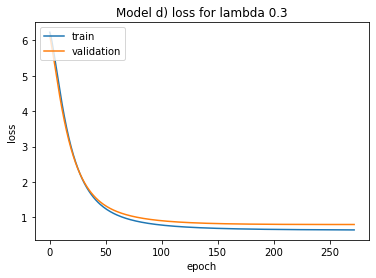

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 8)                 24        
_________________________________________________________________
layer2 (Dense)               (None, 32)                288       
_________________________________________________________________
layer3 (Dense)               (None, 1)                 33        
Total params: 345
Trainable params: 345
Non-trainable params: 0
_________________________________________________________________
Summary of the model for lambda 0.5: None
Accuracy for lambda 0.5: 0.699999988079071


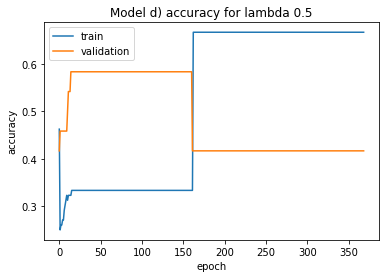

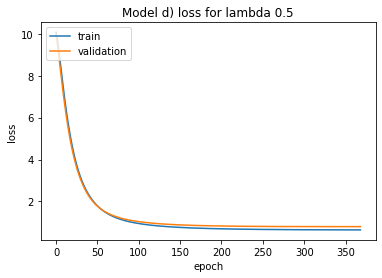

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 8)                 24        
_________________________________________________________________
layer2 (Dense)               (None, 32)                288       
_________________________________________________________________
layer3 (Dense)               (None, 1)                 33        
Total params: 345
Trainable params: 345
Non-trainable params: 0
_________________________________________________________________
Summary of the model for lambda 0.9: None
Accuracy for lambda 0.9: 0.699999988079071


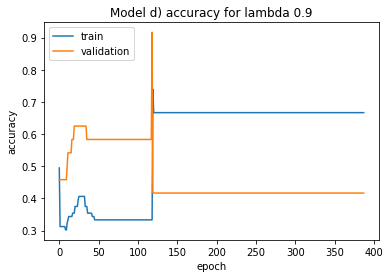

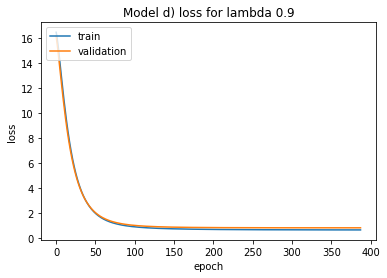

In [4]:
from tensorflow.keras import regularizers

lambdas = [0.1, 0.3, 0.5, 0.9]
for lbd in lambdas:
    # 1. Build the model
    regularizer = regularizers.L2(lbd)
    model = keras.Sequential(
        [
            layers.Dense(8, input_shape = (2,), activation=keras.layers.LeakyReLU(), name="layer1", kernel_regularizer=regularizer),
            layers.Dense(32, activation=keras.layers.LeakyReLU(), name="layer2", kernel_regularizer=regularizer),
            layers.Dense(1, activation=keras.layers.LeakyReLU(), name="layer3", kernel_regularizer=regularizer)
        ]
    )
    print(f'Summary of the model for lambda {lbd}: {model.summary()}')

    # 2. Compile the keras model
    model.compile(loss=loss_fn, optimizer=optimizer, metrics=[metrics])

    # 3. Train the model
    history = model.fit(x=x_train, y=y_train, validation_split=0.2, epochs=epochs, callbacks = [early_stopping], batch_size=batch_size, verbose=0)

    # 4. Evaluate
    evaluation = model.evaluate(x_test, y_test, verbose = 0)

    # 5. Display accuracy
    print(f'Accuracy for lambda {lbd}: {evaluation[1]}')

    # 6. Plot
    ## Accuracy
    plt.plot(history.history['binary_accuracy'])
    plt.plot(history.history['val_binary_accuracy'])
    plt.title('Model d) accuracy for lambda ' + str(lbd))
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

    ## Loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model d) loss for lambda ' + str(lbd))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

**e)** Repeat c), but increase the learning rate to the following values {0.01, 10, 100}. Can you explain the behaviour of the model?  

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 8)                 24        
_________________________________________________________________
layer2 (Dense)               (None, 32)                288       
_________________________________________________________________
layer3 (Dense)               (None, 1)                 33        
Total params: 345
Trainable params: 345
Non-trainable params: 0
_________________________________________________________________
Summary of the model for learning rate 0.01: None
Accuracy for learning rate 0.01: 0.855555534362793


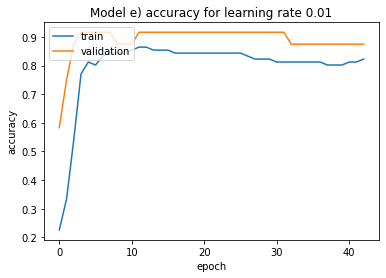

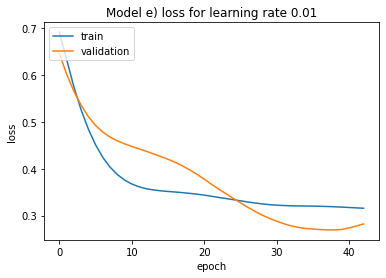

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 8)                 24        
_________________________________________________________________
layer2 (Dense)               (None, 32)                288       
_________________________________________________________________
layer3 (Dense)               (None, 1)                 33        
Total params: 345
Trainable params: 345
Non-trainable params: 0
_________________________________________________________________
Summary of the model for learning rate 10: None
Accuracy for learning rate 10: 0.8888888955116272


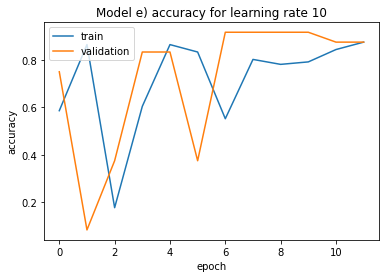

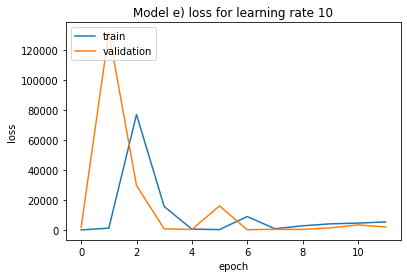

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 8)                 24        
_________________________________________________________________
layer2 (Dense)               (None, 32)                288       
_________________________________________________________________
layer3 (Dense)               (None, 1)                 33        
Total params: 345
Trainable params: 345
Non-trainable params: 0
_________________________________________________________________
Summary of the model for learning rate 100: None
Accuracy for learning rate 100: 0.3888888955116272


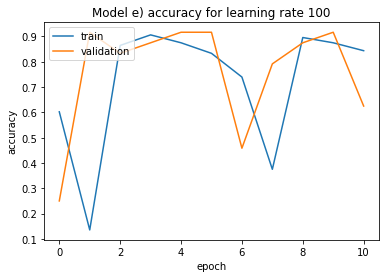

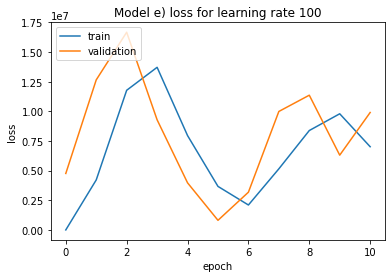

In [6]:
lrs = [1e-2, 10, 100]

for lr in lrs:
    # 0. Optimizer depending on the learning rate
    optimizer = keras.optimizers.Adam(learning_rate=lr)

    # 1. Build the model
    model = keras.Sequential(
        [
            layers.Dense(8, input_shape = (2,), activation=keras.layers.LeakyReLU(), name="layer1"),
            layers.Dense(32, activation=keras.layers.LeakyReLU(), name="layer2"),
            layers.Dense(1, activation=keras.layers.LeakyReLU(), name="layer3")
        ]
    )
    print(f'Summary of the model for learning rate {lr}: {model.summary()}')

    # 2. Compile the keras model
    model.compile(loss=loss_fn, optimizer=optimizer, metrics=[metrics])

    # 3. Train the model
    history = model.fit(x=x_train, y=y_train, validation_split=0.2, epochs=epochs, callbacks = [early_stopping], batch_size=batch_size, verbose=0)

    # 4. Evaluate
    evaluation = model.evaluate(x_test, y_test, verbose = 0)

    # 5. Display accuracy
    print(f'Accuracy for learning rate {lr}: {evaluation[1]}')

    # 6. Plot
    ## Accuracy
    plt.plot(history.history['binary_accuracy'])
    plt.plot(history.history['val_binary_accuracy'])
    plt.title('Model e) accuracy for learning rate ' + str(lr))
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

    ## Loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model e) loss for learning rate ' + str(lr))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

1. For the learning rate 1e-2, a satisfying final accuracy of $\approx 85\%$. The losses decrease smoothly and the early stopping policy only activates around 50 epochs. Compared to the other learning rate choices, this learning rate is slower and the model is more sample inefficient, despite achieving reasonable performance and generealizable behaviour (the validation loss decreases monotonically with the same rate as the train loss). Theoretically, two situations could happen for a small learning rate: a) Or it could get stuck in a local minima, never having enough gradient strength to quit a local valley b) Or it could take "forever" for a model to reach a local/global minima, if the parameter space is stuck on a flat hyperdimensional plane.

2. We could conclude from this exercise, that for a learning rate equal to 10, the model is achieve better evaluation accuracy $\approx 89\%$. With a value of 10, the learning rate is able to peform sufficient changes in the weights to avoid being stuck in local minimas as we can observe from the jumps in the loss plots. Despite the jumps, the model is able to learn by having descendant losses and convergent losses. Theoretically, the model could never converge, due to the high and noisy jumps from the high learning rate, but according to the results, that situation did not occur.

3. For the learning rate equal to 100 the extreme case happens. The changes in the weights are so strong that the model is not able to stabilize and converge as we can observe from the divergent losses and the noisy accuracies (never settling to a final value).